# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [1]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#load and inspect the data
df = pd.read_csv('reg_data.csv')
df.head(2)

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596


In [3]:
assert df.shape == (100,2)

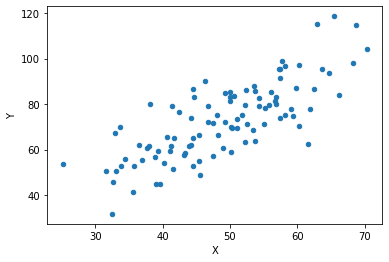

In [8]:
#plot the data (scatter)
df.plot(kind='scatter',x='X',y='Y');

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df.X,df.Y,test_size=.2,random_state=0)

In [18]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

In [23]:
#implement a least squares function to find a, b

def find_a_b(x,y):
    x_mean = x.mean()
    y_mean = y.mean()
    b_upper = sum( ( x - x_mean) * (y - y_mean) )
    b_lower = sum((x - x_mean)**2)
    b = b_upper / b_lower
    a = y_mean - b * x_mean
    return a,b

a,b = find_a_b(x_train,y_train)
print(b)
print(a)

1.3450919020620415
6.687439682550206


In [20]:
assert abs(a - 6.68) <=0.03
assert abs(b - 1.32) <=0.03

In [22]:
line = 0
x = np.array([])
# YOUR CODE HERE
raise NotImplementedError()

-0.9672846112636684

In [21]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

AssertionError: 

In [69]:
a,b = find_a_b(x_train,y_train)
y_test_pred = a + b*x_test

In [70]:
#Classify your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0
class_0 = []
class_1 = []
y_test_predict = y_test_pred.tolist()
for i,y_t in enumerate(y_test):
    if y_t < y_test_predict[i]:
        class_0.append(0)
    else:
        class_1.append(1)
        
class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape);
print(class_1.shape);

(11,)
(9,)


In [71]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

## Plot Train set

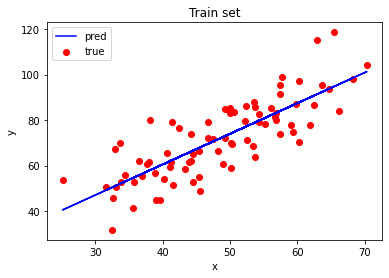

In [72]:
y_train_pred = a + b*x_train

plt.scatter(x_train.values,y_train.values,color='r',label='true')
plt.plot(x_train.values,y_train_pred,color='b',label='pred')
plt.legend()
plt.xlabel('x');
plt.ylabel('y');
plt.title('Train set');

## Plot Test set

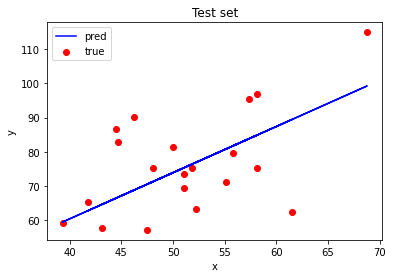

In [73]:
y_test_pred = a + b*x_test

plt.scatter(x_test.values,y_test.values,color='r',label='true')
plt.plot(x_test.values,y_test_pred,color='b',label='pred')
plt.legend()
plt.xlabel('x');
plt.ylabel('y');
plt.title('Test set');